In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv",sep=",")
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [3]:
del df["Index"] # zmazem stlpec index 

In [4]:
bmi = []
for index, row in df.iterrows():
        bmi.append(round( df.iloc[index,2]/np.square(df.iloc[index,1]) *10000,1)) #BMI = m/h²
df["BMI"] = bmi # pridavam novy stlpec BMI

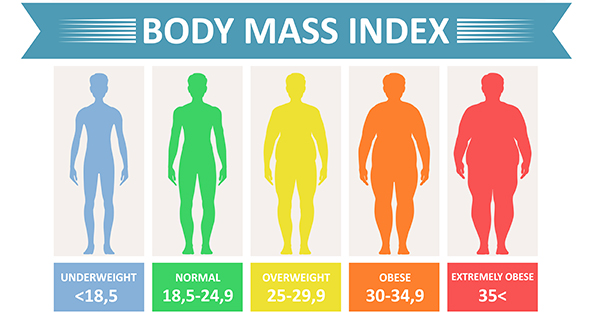

In [5]:
from IPython.display import Image
Image("img_bmi.jpg")

In [6]:
categories = []
for index, row in df.iterrows():
    if ( df.iloc[index,3] <= 18.5 ):
        categories.append(1) # underweight = podvaha
        
    elif ( 18.5 < df.iloc[index,3] <= 24.9 ):
        categories.append(2) # normal = normalna vaha
        
    elif ( 25 <= df.iloc[index,3] <= 29.9 ):
        categories.append(3) # overweight = nadvaha
    
    elif ( 30 <= df.iloc[index,3] <= 34.9 ):
        categories.append(4) # obese = obezny
        
    elif ( df.iloc[index,3] >= 35 ):
        categories.append(5) # extremely obese = extremne obezny
df["Category"] = categories 

In [7]:
df.head()

,Gender,Height,Weight,BMI,Category
0,Male,174,96,31.7,4
1,Male,189,87,24.4,2
2,Female,185,110,32.1,4
3,Female,195,104,27.4,3
4,Male,149,61,27.5,3


In [8]:
df.sort_values(by=['BMI'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
df

,Gender,Height,Weight,BMI,Category
0,Male,198,50,12.8,1
1,Female,198,50,12.8,1
2,Female,196,50,13.0,1
3,Female,190,50,13.9,1
4,Male,190,50,13.9,1
...,...,...,...,...,...
495,Male,140,146,74.5,5
496,Female,140,146,74.5,5
497,Male,145,160,76.1,5
498,Male,140,152,77.6,5


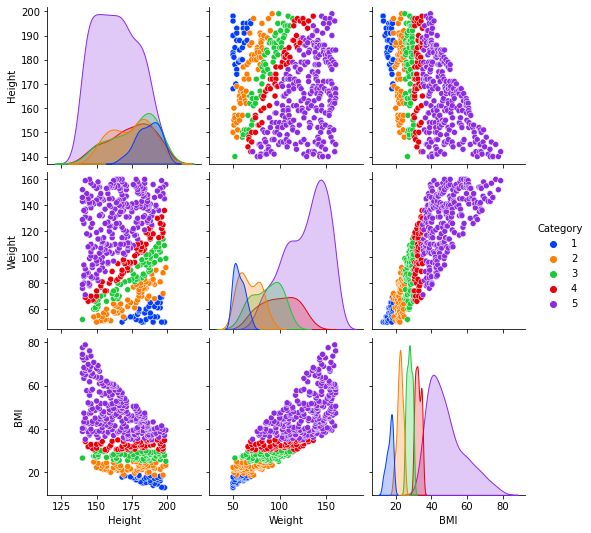

In [10]:
import seaborn as sns
sns.pairplot(data=df, hue='Category', palette= "bright")

In [11]:
df.Category.value_counts()

5    268
3     70
4     64
2     63
1     35
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

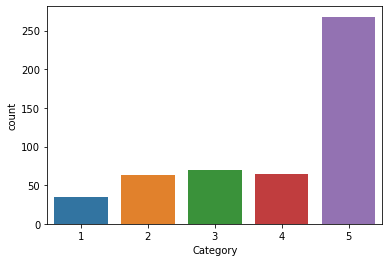

In [12]:
sns.countplot(x='Category',data=df)

<h1>Model - Keras</h1>

In [13]:
x = df.iloc[:,[1,2]].values # hodnoty o vyske a vahe
y = df.iloc[:,4].values # category

In [14]:
from keras.utils import to_categorical 
y = to_categorical(y)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2) # test size urci podiel. 80% ku 20% 

In [16]:
import keras 
from keras.models import Sequential # sekvencny model
from keras.layers import Dense # dense = vrstvy

In [17]:
moj_keras_model = Sequential()
moj_keras_model.add(Dense(30,input_dim=2,activation="tanh")) # aktivacna funkcia tanh
moj_keras_model.add(Dense(30,activation="tanh")) 
moj_keras_model.add(Dense(6))
moj_keras_model.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])

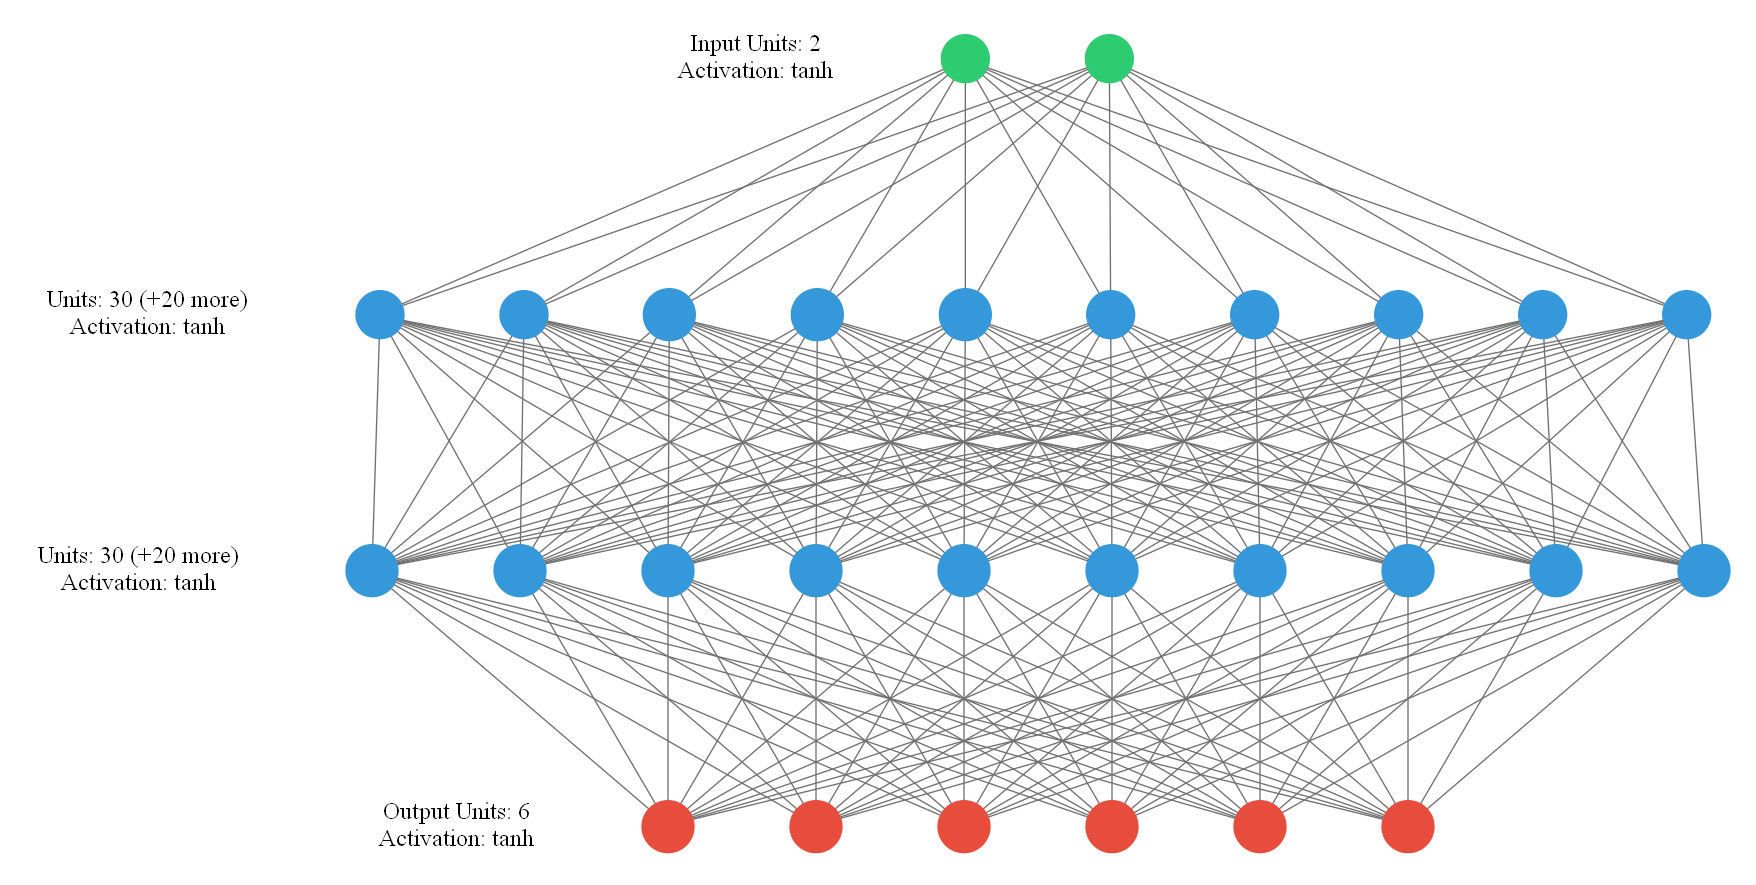

In [18]:
# img
from keras_visualizer import visualizer 
visualizer(moj_keras_model, filename='img_NS',format = "png",view=False)
Image("img_NS.png")

In [19]:
# trenovanie
history = moj_keras_model.fit(X_train,y_train,epochs=350)

Epoch 1/350
13/13 [==============================] - 1s 1ms/step - loss: 0.5006 - accuracy: 0.0357
Epoch 2/350
13/13 [==============================] - 0s 1ms/step - loss: 0.1701 - accuracy: 0.5193
Epoch 3/350
13/13 [==============================] - 0s 666us/step - loss: 0.1177 - accuracy: 0.5363
Epoch 4/350
13/13 [==============================] - 0s 794us/step - loss: 0.0919 - accuracy: 0.5373
Epoch 5/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0703 - accuracy: 0.6925
Epoch 6/350
13/13 [==============================] - 0s 2ms/step - loss: 0.0614 - accuracy: 0.7425
Epoch 7/350
13/13 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.7607
Epoch 8/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0552 - accuracy: 0.7616
Epoch 9/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0531 - accuracy: 0.7662
Epoch 10/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0530 - accuracy: 0.7674
Epoch

13/13 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.7895
Epoch 83/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.7750
Epoch 84/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0468 - accuracy: 0.7772
Epoch 85/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0425 - accuracy: 0.8206
Epoch 86/350
13/13 [==============================] - 0s 667us/step - loss: 0.0465 - accuracy: 0.7811
Epoch 87/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 0.7702
Epoch 88/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 0.7810
Epoch 89/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0467 - accuracy: 0.7751
Epoch 90/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0478 - accuracy: 0.7658
Epoch 91/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0428 - accuracy: 0.7814
Epoch 92/35

13/13 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.7839
Epoch 163/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0445 - accuracy: 0.7867
Epoch 164/350
13/13 [==============================] - 0s 668us/step - loss: 0.0427 - accuracy: 0.8165
Epoch 165/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0429 - accuracy: 0.8016
Epoch 166/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0451 - accuracy: 0.7766
Epoch 167/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0454 - accuracy: 0.7964
Epoch 168/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0437 - accuracy: 0.8067
Epoch 169/350
13/13 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.7978
Epoch 170/350
13/13 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.7573
Epoch 171/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 0.8082
Ep

13/13 [==============================] - 0s 1ms/step - loss: 0.0434 - accuracy: 0.7790
Epoch 243/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0453 - accuracy: 0.8062
Epoch 244/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.8123
Epoch 245/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.7784
Epoch 246/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0463 - accuracy: 0.7692
Epoch 247/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0461 - accuracy: 0.7965
Epoch 248/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0485 - accuracy: 0.7663
Epoch 249/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0439 - accuracy: 0.7952
Epoch 250/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.7834
Epoch 251/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0456 - accuracy: 0.7770
Epoc

13/13 [==============================] - 0s 1ms/step - loss: 0.0431 - accuracy: 0.8148
Epoch 323/350
13/13 [==============================] - 0s 666us/step - loss: 0.0462 - accuracy: 0.7916
Epoch 324/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0453 - accuracy: 0.7684
Epoch 325/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 0.7899
Epoch 326/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0436 - accuracy: 0.7889
Epoch 327/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0504 - accuracy: 0.7762
Epoch 328/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0473 - accuracy: 0.7730
Epoch 329/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0454 - accuracy: 0.7747
Epoch 330/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0439 - accuracy: 0.8009
Epoch 331/350
13/13 [==============================] - 0s 1ms/step - loss: 0.0433 - accuracy: 0.8014
Ep

In [20]:
maxPresnost = max(history.history["accuracy"])*100
minPresnost = min(history.history["accuracy"])*100
print("Maximalna presnost pri trenovani NS: %.0f"%maxPresnost, "%")
print("Minimalna presnost pri trenovani NS: %.0f"%minPresnost, "%")

Maximalna presnost pri trenovani NS: 80 %
Minimalna presnost pri trenovani NS: 11 %


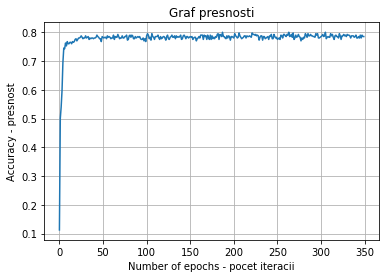

In [21]:
plt.title("Graf presnosti")
plt.plot(history.history["accuracy"])
plt.xlabel("Number of epochs - pocet iteracii")
plt.ylabel("Accuracy - presnost")
plt.grid()
plt.show()

In [22]:
maxChybovost = max(history.history["loss"])*100
minChybovost = min(history.history["loss"])*100
print("Maximalna chybovost pri trenovani NS: %.0f"%maxChybovost, "%")
print("Minimalna chybovost pri trenovani NS: %.0f"%minChybovost, "%")

Maximalna chybovost pri trenovani NS: 37 %
Minimalna chybovost pri trenovani NS: 4 %


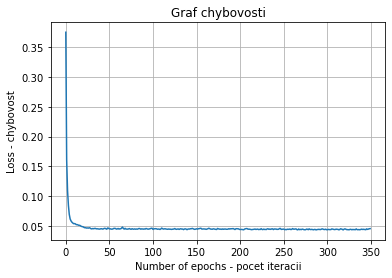

In [23]:
plt.title('Graf chybovosti')
plt.plot(history.history['loss'])
plt.xlabel('Number of epochs - pocet iteracii')
plt.ylabel('Loss - chybovost')
plt.grid()
plt.show()

In [24]:
# predikcie
predikcie = moj_keras_model.predict_classes(X_test)
predikcie

C:\Users\keres\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([5, 2, 2, 5, 5, 5, 2, 5, 5, 3, 2, 5, 5, 3, 3, 4, 5, 5, 5, 5, 3, 5,
       5, 5, 5, 4, 2, 3, 5, 5, 5, 4, 3, 2, 5, 5, 1, 5, 5, 3, 5, 2, 3, 3,
       3, 1, 5, 5, 3, 2, 3, 5, 5, 5, 5, 3, 5, 2, 2, 3, 5, 4, 4, 5, 5, 1,
       1, 5, 5, 5, 2, 2, 3, 5, 5, 5, 2, 1, 5, 5, 3, 1, 5, 5, 3, 5, 3, 5,
       3, 5, 5, 2, 5, 5, 4, 5, 2, 3, 1, 5], dtype=int64)

In [25]:
# skutocne hodnoty
y_test.argmax(1) #argmax vrati poziciu najvacsej hodnoty

array([5, 3, 2, 5, 5, 5, 3, 5, 5, 3, 2, 5, 5, 4, 3, 4, 5, 5, 5, 5, 3, 5,
       5, 5, 5, 4, 2, 3, 5, 5, 5, 4, 3, 3, 5, 5, 2, 5, 5, 3, 5, 1, 3, 4,
       4, 1, 5, 4, 3, 2, 3, 5, 5, 5, 5, 4, 5, 2, 1, 3, 5, 5, 5, 5, 5, 1,
       2, 5, 5, 5, 3, 2, 4, 5, 5, 5, 3, 2, 5, 5, 3, 1, 5, 4, 4, 5, 3, 5,
       3, 5, 5, 2, 5, 5, 5, 5, 2, 3, 1, 5], dtype=int64)

In [26]:
# zistime aky je presny model
from sklearn import metrics
presnost = metrics.accuracy_score(predikcie, y_test.argmax(1))*100 
print('Presnost modelu: ', presnost, "%")

Presnost modelu:  79.0 %


In [27]:
# metoda predictBMICategory - predikcia na zaklade vysky a vahy
def predictBMICategory(height,weight):
    vyskaVaha = ([[height, weight]]) 
    y_pred = moj_keras_model.predict_classes(vyskaVaha)
    if y_pred == 1:
        return 'Underweight'
    elif y_pred == 2:
        return 'Normal'
    elif y_pred == 3:
        return 'Overweight'
    elif y_pred == 4:
        return 'Obese'
    elif y_pred == 5:
        return 'Exremely obese'

In [28]:
# metoda realBMICategory - skutocny vysledok na zaklade vysky a vahy
def realBMICategory(height,weight):
    
    bmi = round( weight/np.square(height) *10000,1) #BMI = m/h²
    
    if ( bmi <= 18.5 ):
        return "Underweight" # underweight = podvaha
        
    elif ( 18.5 < bmi <= 24.9 ):
        return "Normal" # normal = normalna vaha
        
    elif ( 25 <= bmi <= 29.9 ):
        return "Overweight" # overweight = nadvaha
    
    elif ( 30 <= bmi <= 34.9 ):
        return "Obese" # obese = obezny
        
    elif ( bmi >= 35 ):
        return "Exremely obese" # extremely obese = extremne obezny

In [29]:
# a=predikcia; b = skutocny vysledok
a = predictBMICategory(183,63)
b = realBMICategory(183,63)
print("Predikcia -",a)
print("Skutocnost -",b)

Predikcia - Normal
Skutocnost - Normal
